In [ ]:
import pandas as pd


#We used the following so we didnt have to reupload the data file we wanted to use repeatedly
#make sure to upload the 'fer2013.csv' file to your google drive (way faster)
#from google.colab import drive
#drive.mount('/content/drive')

#can use the following when you want to upload the dataset to your notebook once
#will be prompted to upload the file, takes a quite a bit of time (32 mins)

from google.colab import files
uploaded = files.upload()



Mounted at /content/drive


In [ ]:
#various imports needed for this notebook
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from imblearn.over_sampling import RandomOverSampler
import os


#need the below pieces of code to use TPU provided by google colab 
#if there are no TPUs available, you may see an error message about how resources are being shared and thats how google colab is kept free
#if this happens, just try again or try much later in the day. We have noticed that during the night time, TPUs seem to always be available

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR']) #Connect to the TPU handle and initialise it
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.38.231.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.38.231.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
#use this if mounted to drive/ change the directory depending on where you stored the file
#df = pd.read_csv('/content/drive/MyDrive/fer2013.csv')

#use this if you uploaded the dataset to google colab
df = pd.read_csv('fer2013.csv')

In [ ]:
df 

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:

x = df['pixels']
y = df['emotion']

#will oversample our dataset, this is needed because our data is imbalanced
#equalizes the data by repeating some of the images for each category
oversampler = RandomOverSampler(sampling_strategy='auto')

x_over, y_over = oversampler.fit_resample(x.values.reshape(-1,1), y)


In [ ]:
#will make the data look like rows of numbers separated by spaces in order to do the next step properly
x_over=pd.Series(x_over.flatten())

In [ ]:

x_arr = []
#converts all data in the pixels column from lists of numbers separated by spaces to array of pixels and appends it to the X_arr
for i in range(x_over.count()):
    if not type(x_over[i]) == list : 
      x_arr.append(np.array(x_over[i].split(), np.float32))
    else:
      x_arr.append(np.array(x_over[i],np.float32))





In [ ]:
#makes a huge array of all the arrays, needs to be done in order divide the numbers by 255 and will be how we train the model
x_arr = np.array(x_arr)

In [ ]:
#divides the pixels by 255 in order to normalize the numbers between 0-1 so the computations are faster
x_arr/=255


In [ ]:
#reshapes both arrays since all images are of format 48x48. 1 is used for greyscale images while 3 is for RGB
x_arr = x_arr.reshape(-1, 48, 48,1)
y_arr = np.array(y_over)

y_arr = y_arr.reshape(y_over.count(), 1)


In [ ]:
#split data into 3 sets, training, validation, and test

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size = 0.2, random_state = 42)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [ ]:
#only need to run this to see if the train set has anything in common with the validation set
same = 0
for i in range(0,6292):
  if (x_train[i] == x_valid[i]).all():
    same+=1
print(same/6293)


0.0


In [ ]:
#changes from integers to arrays of 0 and 1 
#where the index number equals the number associated to an emotion i.e  if 1 is found at the 0th index than the emotion is Angry
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)
y_valid = np_utils.to_categorical(y_valid, 7)

In [ ]:
#creates model, strategy.scope() is used in order to use the tpu when fitting the model, reduces the time significantly
with strategy.scope():
  model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 48x48 with 1 channel depth, 1 represents greyscale
      # This is the first convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      # The second convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fourth convolution
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      # 200 neuron hidden layer
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(7, activation='softmax')
  ])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 128)       

In [ ]:

#fits model
history = model.fit(x_train,y_train, epochs=70, validation_data=(x_valid,y_valid),verbose=1)



Epoch 1/70
1574/1574 [==============================] - 41s 21ms/step - loss: 1.8964 - accuracy: 0.2035 - val_loss: 1.7518 - val_accuracy: 0.3143
Epoch 2/70
1574/1574 [==============================] - 29s 19ms/step - loss: 1.7016 - accuracy: 0.3396 - val_loss: 1.5698 - val_accuracy: 0.4098
Epoch 3/70
1574/1574 [==============================] - 30s 19ms/step - loss: 1.5666 - accuracy: 0.4042 - val_loss: 1.4434 - val_accuracy: 0.4584
Epoch 4/70
1574/1574 [==============================] - 30s 19ms/step - loss: 1.4696 - accuracy: 0.4444 - val_loss: 1.3668 - val_accuracy: 0.4874
Epoch 5/70
1574/1574 [==============================] - 30s 19ms/step - loss: 1.3883 - accuracy: 0.4770 - val_loss: 1.2912 - val_accuracy: 0.5157
Epoch 6/70
1574/1574 [==============================] - 29s 19ms/step - loss: 1.3258 - accuracy: 0.5015 - val_loss: 1.2194 - val_accuracy: 0.5454
Epoch 7/70
1574/1574 [==============================] - 29s 18ms/step - loss: 1.2608 - accuracy: 0.5225 - val_loss: 1.1713 -

In [ ]:
model.save("emotion6.h5")


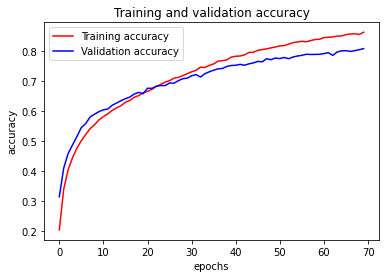

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

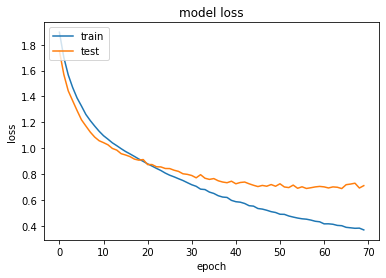

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
 #In case you want to load the model from your google drive
 #model1 =tf.keras.models.load_model('/content/drive/MyDrive/emotion6.h5')

In [ ]:
#testing
y_pred = model1.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred)) #since the predictions will return arrays where 1 is slot for the emotion it predicted, the argmax() will return the index number where it found the 1
y_result[:10]

[2, 2, 4, 3, 5, 5, 3, 3, 1, 6]

In [ ]:
#actual emotion number associated with x_test
y_true_result = []

for pred in y_test:
    y_true_result.append(np.argmax(pred))
y_true_result[:10]

[2, 2, 4, 2, 5, 4, 3, 3, 1, 6]